<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [5]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
import cmath
#import warnings
#warnings.filterwarnings('ignore')

In [6]:
#Define functions
###############################################
###############################################
def E_Field(x,t0):
    k=pi
    w=4.
    result = np.sin(k*x)*np.sin(w*t0)
    return result

def B_Field(x,t0):
    k=pi
    w=4.
    result = np.cos(k*x)*np.cos(w*t0)
    return result

def Poynting_vec(x,t0):
    k=pi
    w=4.
    result = np.sin(k*x)*np.sin(w*t0)*np.cos(k*x)*np.cos(w*t0)
    return result

def plane(x_loc):
    # create x,y
    yy, zz = np.meshgrid([-1,1], [-1,1])

    # calculate corresponding z
    xx = x_loc
    return xx, yy, zz

<IPython.core.display.Javascript object>


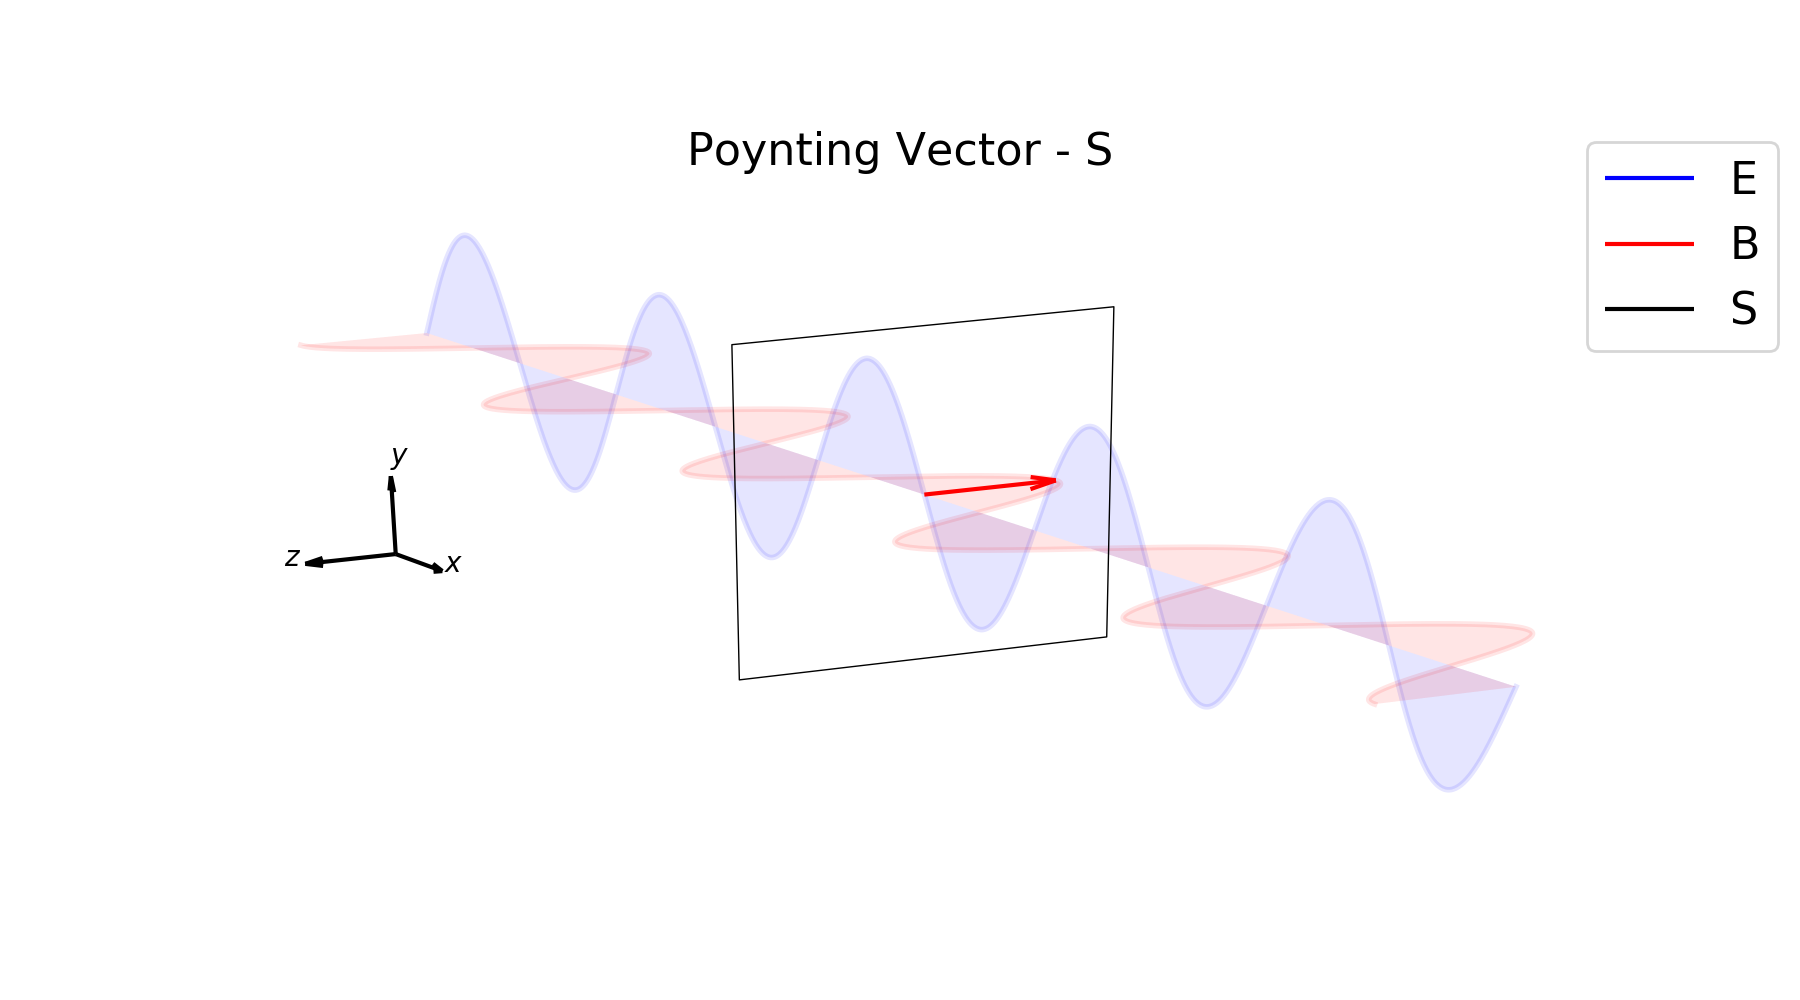

In [7]:
#Define plot
###############################################
###############################################
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(left=0., bottom=None, right=1, top=None, wspace=None, hspace=1.)


x = np.linspace(0., 10., 1000)
t0 = pi/16.
x0 = 5
#############################
#plot1
y_max = 1

#E-field
ax.plot(x, E_Field(x,t0), 'b-', zdir='y', lw=2, alpha=0.1)
ax.add_collection3d(plt.fill_between(x, E_Field(x,t0),0, facecolor='blue', alpha=0.05), zdir='y')

#B-field
ax.plot(x, -B_Field(x,t0), 'r-', zdir='z', lw=2, alpha=0.1)
ax.add_collection3d(plt.fill_between(x, -B_Field(x,t0),0, facecolor='red', alpha=0.05), zdir='z')


plt.quiver(1.5, -1, -1, 0, 0, 0.5, arrow_length_ratio = 0.2, color='k')
plt.quiver(1.5, -1, -1, 0, -0.5, 0, arrow_length_ratio = 0.2, color='k')
plt.quiver(1.5, -1, -1, 0.5, 0, 0, arrow_length_ratio = 0.2, color='k')
ax.text(1.5+0.52, -1, -1, '$x$')
ax.text(1.5, -1-0.62, -1, '$z$')
ax.text(1.5, -1, -1+0.58, '$y$')

#############################
#Poynting vec
xx, yy, zz = plane(x0)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, linewidth=0.5, edgecolors='k', color='white', alpha=0)

plt.quiver(x0, 0, 0, 0, 0, E_Field(x0,t0), arrow_length_ratio = 0.2, color='b', label='E')
plt.quiver(x0, 0, 0, 0, -B_Field(x0,t0), 0, arrow_length_ratio = 0.2, color='r', label='B')
plt.quiver(x0, 0, 0, -Poynting_vec(x0,t0), 0, 0, arrow_length_ratio = 0.2, color='k', label='S')

#scale the 3d axes (from:https://stackoverflow.com/questions/30223161/
#matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo)
x_scale=5
y_scale=1
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj
#end scaling


#plot params
ax.set_title('Poynting Vector - S', fontsize=16)
ax.set_xlim(min(x),max(x))
ax.set_ylim(-y_max,y_max)
ax.legend(loc=1, fontsize=16)
ax.axis('off')
ax.view_init(26, -30)
ax.dist = 4.5
    

#Define plot updater
###############################################
###############################################
def update(x0):
    #line_1.set_ydata(theta(t,w0,gamma))   
    
    ax.clear()
    #############################
    #plot1
    y_max = 1
    
    
    #E-field
    ax.plot(x, E_Field(x,t0), 'b-', zdir='y', lw=2, alpha=0.1)
    ax.add_collection3d(plt.fill_between(x, E_Field(x,t0),0, facecolor='blue', alpha=0.05), zdir='y')

    #B-field
    ax.plot(x, -B_Field(x,t0), 'r-', zdir='z', lw=2, alpha=0.1)
    ax.add_collection3d(plt.fill_between(x, -B_Field(x,t0),0, facecolor='red', alpha=0.05), zdir='z')

    
    plt.quiver(1.5, -1, -1, 0, 0, 0.5, arrow_length_ratio = 0.2, color='k')
    plt.quiver(1.5, -1, -1, 0, -0.5, 0, arrow_length_ratio = 0.2, color='k')
    plt.quiver(1.5, -1, -1, 0.5, 0, 0, arrow_length_ratio = 0.2, color='k')
    ax.text(1.5+0.52, -1, -1, '$x$')
    ax.text(1.5, -1-0.62, -1, '$z$')
    ax.text(1.5, -1, -1+0.58, '$y$')
        
    #############################
    #Poynting vec
    xx, yy, zz = plane(x0)
    ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, linewidth=0.5, edgecolors='k', color='white', alpha=0)
    
    plt.quiver(x0, 0, 0, 0, 0, E_Field(x0,t0), arrow_length_ratio = 0.2, color='b', label='E')
    plt.quiver(x0, 0, 0, 0, -B_Field(x0,t0), 0, arrow_length_ratio = 0.2, color='r', label='B')
    plt.quiver(x0, 0, 0, Poynting_vec(x0,t0), 0, 0, arrow_length_ratio = 0.2, color='k', label='S')
    
    #scale the 3d axes (from:https://stackoverflow.com/questions/30223161/
    #matplotlib-mplot3d-how-to-increase-the-size-of-an-axis-stretch-in-a-3d-plo)
    x_scale=5
    y_scale=1
    z_scale=2

    scale=np.diag([x_scale, y_scale, z_scale, 1.0])
    scale=scale*(1.0/scale.max())
    scale[3,3]=1.0

    def short_proj():
      return np.dot(Axes3D.get_proj(ax), scale)

    ax.get_proj=short_proj
    #end scaling


    #plot params
    ax.set_title('Poynting Vector - S', fontsize=16)
    ax.set_xlim(min(x),max(x))
    ax.set_ylim(-y_max,y_max)
    ax.legend(loc=1, fontsize=16)
    ax.axis('off')
    ax.view_init(26, -30)
    ax.dist = 4.5
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.FloatSlider(
    min=0.,
    max=10,
    step=0.2,
    value=5,
    layout=Layout(width='500px'),
    description='$x_0$',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'x0': s1})


#Set layout
###############################################
###############################################
Vbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s1], layout=Vbox_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3"><b>Plot:</b> Electric and magnetic field amplitudes of a standing plane wave as a function spatial position are shown, at a fixed time. The Poynting vector is shown at a particular position in space, $x_{0}$, which can be varied.</font>

<br/>
<font size="3"><b>Sliders:</b> vary time $x_{0}$ and to see the electric and magnetic field vectors, and the resulting pointing vector, at a particular position in space.
</font>
<br/>
<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>How do the electric and magetic field vectors change as a function of position, at a fixed time?</li>
    <li>What is the magnitude and direction of the Poynting vector at different locations?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [8]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
